In [51]:
import yfinance as yf
import pandas as pd
nifty50_tickers = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS",
    "HINDUNILVR.NS", "ITC.NS", "LT.NS", "SBIN.NS", "KOTAKBANK.NS",
    "AXISBANK.NS", "ASIANPAINT.NS", "BAJFINANCE.NS", "BHARTIARTL.NS",
    "HCLTECH.NS", "SUNPHARMA.NS", "MARUTI.NS", "NTPC.NS", "TITAN.NS",
    "ULTRACEMCO.NS", "WIPRO.NS", "TECHM.NS", "POWERGRID.NS", "NESTLEIND.NS",
    "JSWSTEEL.NS", "TATASTEEL.NS", "ADANIENT.NS", "COALINDIA.NS", "BAJAJFINSV.NS",
    "DIVISLAB.NS", "GRASIM.NS", "HDFCLIFE.NS", "CIPLA.NS", "SBILIFE.NS",
    "BRITANNIA.NS", "EICHERMOT.NS", "HEROMOTOCO.NS", "BAJAJ-AUTO.NS", "INDUSINDBK.NS",
    "BPCL.NS", "SHREECEM.NS", "DRREDDY.NS", "HINDALCO.NS", "ONGC.NS",
    "TATAMOTORS.NS", "APOLLOHOSP.NS", "M&M.NS", "UPL.NS", "ADANIPORTS.NS"
]
data = yf.download(nifty50_tickers, start="2020-01-01", end="2025-01-01")
data.to_csv("nifty50_data.csv")

C:\Users\saran\AppData\Local\Temp\ipykernel_9356\4130209058.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nifty50_tickers, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  49 of 49 completed


In [52]:
import pandas as pd
data = pd.read_csv("nifty50_data.csv", index_col=0, parse_dates=True, header=[0, 1])

In [53]:
print("Sample columns:", data.columns.tolist()[:5])
print("Available metrics (second level):", data.columns.get_level_values(1).unique())

Sample columns: [('Close', 'ADANIENT.NS'), ('Close', 'ADANIPORTS.NS'), ('Close', 'APOLLOHOSP.NS'), ('Close', 'ASIANPAINT.NS'), ('Close', 'AXISBANK.NS')]
Available metrics (second level): Index(['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS',
       'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
       'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
       'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS',
       'SBILIFE.NS', 'SBIN.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'UPL.NS', 'WIPRO.NS'],
      dtype='object', name='Tick

In [54]:
# Remove NaN values
data.dropna(inplace=True)

In [59]:
import numpy as np
print("Cleaned Data:")
print(data.head())
returns = data['Close'].pct_change().dropna()
log_returns = np.log(1 + returns).dropna()
print("\nDaily Returns:")
print(returns.head())
print("\nLog Returns:")
print(log_returns.head())

Cleaned Data:
Price            Close                                                        \
Ticker     ADANIENT.NS ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS AXISBANK.NS   
Date                                                                           
2020-01-01  205.824875    362.584290   1404.969849   1708.077148  745.586914   
2020-01-02  209.142181    367.864838   1472.245972   1705.648071  753.802612   
2020-01-03  206.270477    367.240814   1463.824219   1668.261475  739.860840   
2020-01-06  197.605713    365.032501   1440.577881   1626.112061  720.242737   
2020-01-07  202.061874    369.449036   1456.535034   1642.543213  722.732300   

Price                                                               \
Ticker     BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS   
Date                                                                 
2020-01-01   2636.314453    935.214905    414.094757    433.316467   
2020-01-02   2611.960205    947.894348    415.538269    435.13272

EDA: Summary Stats + Visualizations

Ticker  ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  AXISBANK.NS  \
count   1237.000000    1237.000000    1237.000000    1237.000000  1237.000000   
mean       0.002624       0.001333       0.001556       0.000363     0.000559   
std        0.034121       0.026113       0.021328       0.016448     0.023065   
min       -0.281970      -0.211497      -0.149896      -0.140279    -0.279108   
25%       -0.009501      -0.009588      -0.008647      -0.007489    -0.009270   
50%        0.001669       0.000728       0.000560       0.000411     0.000704   
75%        0.014283       0.012649       0.010282       0.007911     0.011019   
max        0.236630       0.153019       0.154944       0.088527     0.194807   

Ticker  BAJAJ-AUTO.NS  BAJAJFINSV.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
count     1237.000000    1237.000000    1237.000000    1237.000000   
mean         0.001107       0.000674       0.000693       0.001203   
std          0.017442       0.022441       0.024044       0.

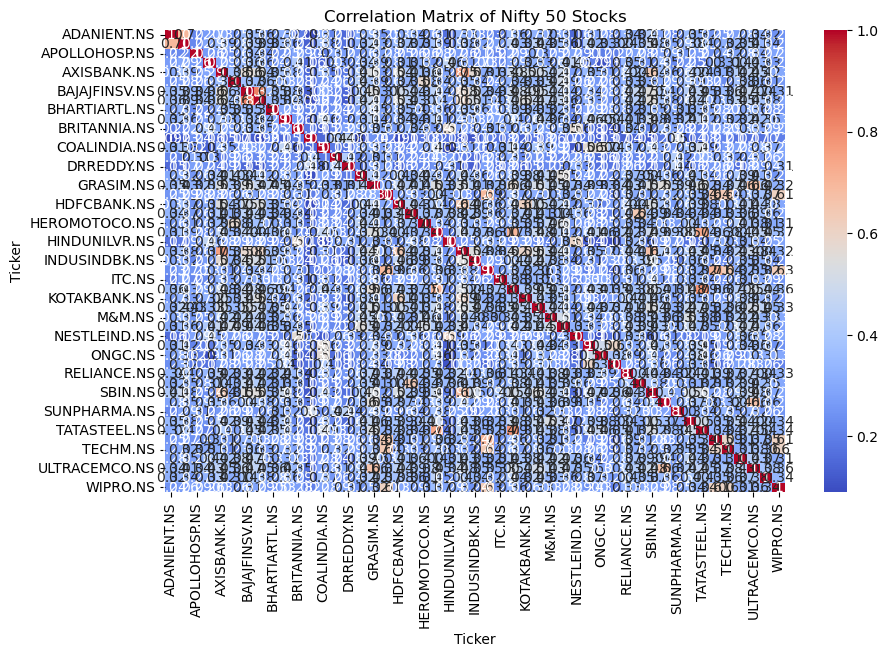

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
print(returns.describe())
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Nifty 50 Stocks")
plt.show()


Risk-Return Summary:
               Mean Daily Return  Daily Volatility (Std Dev)
Ticker                                                      
ADANIENT.NS             0.002624                    0.034121
M&M.NS                  0.001658                    0.021477
APOLLOHOSP.NS           0.001556                    0.021328
TATAMOTORS.NS           0.001485                    0.026834
SUNPHARMA.NS            0.001359                    0.016114
ADANIPORTS.NS           0.001333                    0.026113
JSWSTEEL.NS             0.001288                    0.022545
TATASTEEL.NS            0.001280                    0.023691
HCLTECH.NS              0.001263                    0.017474
POWERGRID.NS            0.001243                    0.018117
HINDALCO.NS             0.001204                    0.026078
BHARTIARTL.NS           0.001203                    0.017910
DIVISLAB.NS             0.001176                    0.018495
GRASIM.NS               0.001170                    0.019278
NT

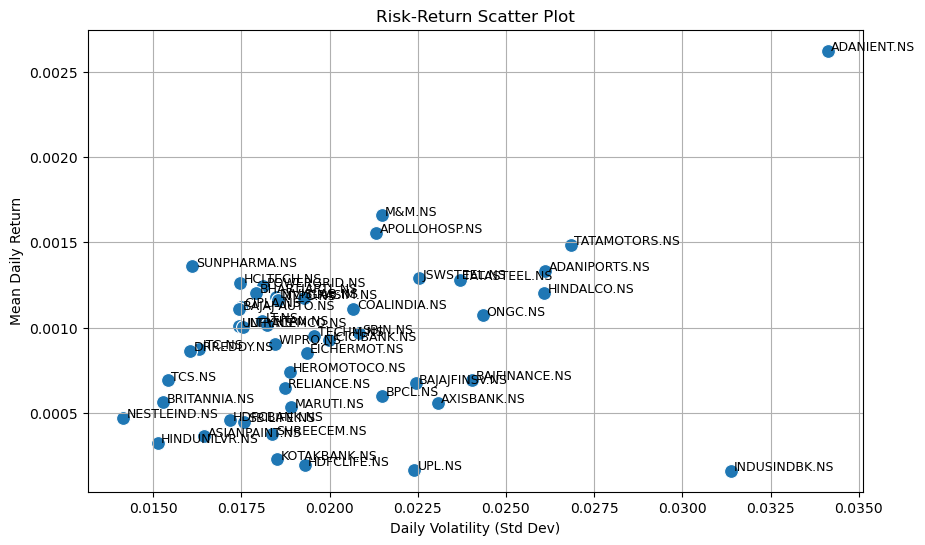

In [63]:
#Risk return summary
risk_return_summary = pd.DataFrame({
    'Mean Daily Return': returns.mean(),
    'Daily Volatility (Std Dev)': returns.std()
}).sort_values(by='Mean Daily Return', ascending=False)
print("\nRisk-Return Summary:")
print(risk_return_summary)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Volatility (Std Dev)', y='Mean Daily Return', data=risk_return_summary, s=100)
for ticker in risk_return_summary.index:
    plt.text(risk_return_summary.loc[ticker, 'Daily Volatility (Std Dev)'] + 0.0001,
             risk_return_summary.loc[ticker, 'Mean Daily Return'],
             ticker, fontsize=9)
plt.xlabel('Daily Volatility (Std Dev)')
plt.ylabel('Mean Daily Return')
plt.title('Risk-Return Scatter Plot')
plt.grid(True)
plt.show()

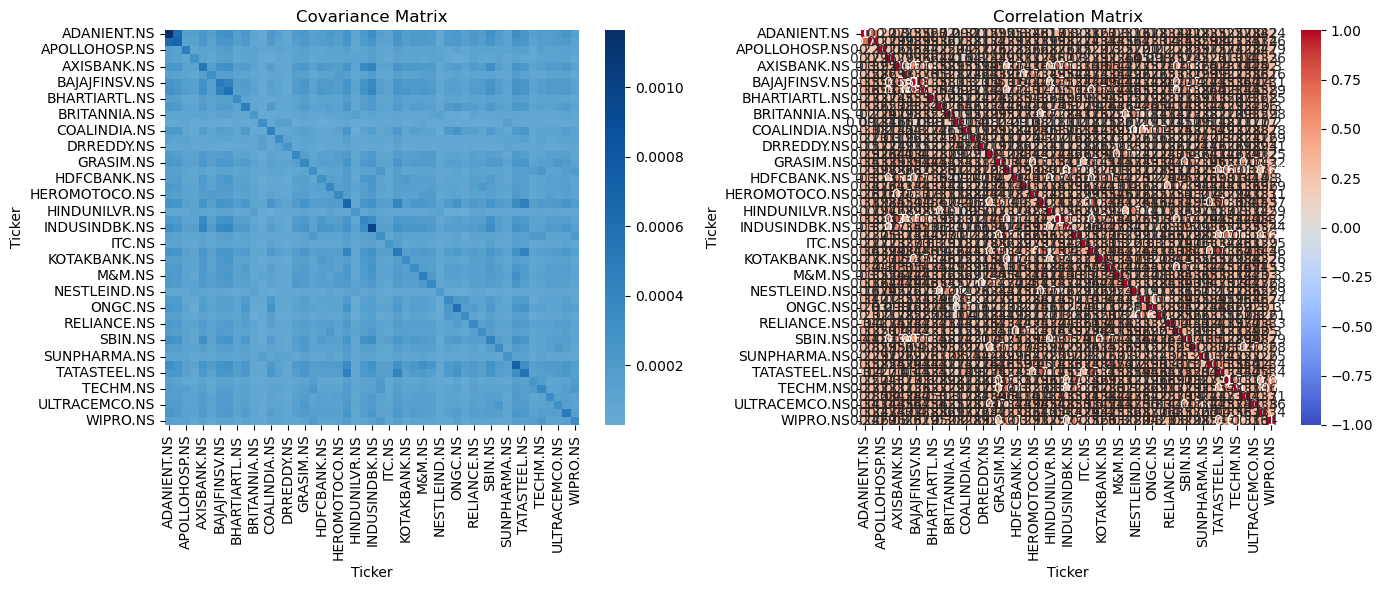

In [64]:
import seaborn as sns
cov_matrix = returns.cov()
corr_matrix = returns.corr()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cov_matrix, cmap='Blues', center=0)
plt.title('Covariance Matrix')
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [65]:
def predict_returns(returns, n_lags):
    X_all = []
    y_all_dict = {ticker: [] for ticker in returns.columns}
    for i in range(n_lags, len(returns) - 1):
        lagged = returns.iloc[i - n_lags:i].values.flatten()
        X_all.append(lagged)
        for ticker in returns.columns:
            y_all_dict[ticker].append(returns.iloc[i + 1][ticker])
    X = np.array(X_all)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    latest_input = returns.iloc[-n_lags:].values.flatten().reshape(1, -1)
    latest_input_scaled = scaler.transform(latest_input)
    predicted_returns = []
    for ticker in returns.columns:
        y = np.array(y_all_dict[ticker])
        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X_scaled[:len(y)], y)
        pred = model.predict(latest_input_scaled)[0]
        predicted_returns.append(pred)
    return np.array(predicted_returns)

In [66]:
def optimize_portfolio(mu, Sigma, rf, tickers, max_variance=0.0002):
    n = len(mu)
    mu_hist = np.mean(mu)
    shrinkage_factor = 0.5
    mu_shrunk = shrinkage_factor * mu + (1 - shrinkage_factor) * mu_hist
    w_mvo = cp.Variable(n)
    portfolio_return = mu_shrunk @ w_mvo
    portfolio_variance = cp.quad_form(w_mvo, Sigma)
    max_weight = 0.3
    constraints = [
    cp.sum(w_mvo) == 1,     
    w_mvo >= 0,              
    w_mvo <= max_weight,     
    portfolio_variance <= max_variance 
]
    prob = cp.Problem(cp.Maximize(portfolio_return), constraints)
    prob.solve()
    weights_mvo = w_mvo.value

    # Max Sharpe
    def neg_sharpe(w):
        ret = np.dot(w, mu)
        vol = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
        return -(ret - rf) / vol

    bounds = [(0, 0.2)] * n
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    init_guess = np.repeat(1/n, n)

    result = minimize(neg_sharpe, init_guess, method='SLSQP',
                      bounds=bounds, constraints=constraints)
    weights_sharpe = result.x

    ret = np.dot(weights_sharpe, mu)
    vol = np.sqrt(np.dot(weights_sharpe.T, np.dot(Sigma, weights_sharpe)))
    sharpe = (ret - rf) / vol

    return weights_mvo, weights_sharpe, ret, vol, sharpe

In [68]:
def equal_weight_portfolio(mu, Sigma, rf):
    n = len(mu)
    w_eq = np.repeat(1/n, n)
    ret = np.dot(w_eq, mu)
    vol = np.sqrt(np.dot(w_eq.T, np.dot(Sigma, w_eq)))
    sharpe = (ret - rf) / vol
    return w_eq, ret, vol, sharpe

In [70]:
def _nearest_psd(A, eps=1e-10):
    B = 0.5*(A + A.T)
    w, V = np.linalg.eigh(B)
    w_clipped = np.clip(w, eps, None)
    return (V * w_clipped) @ V.T
def market_implied_delta(returns, rf, market_weights):
    mu_mkt = returns.mean().values @ market_weights
    var_mkt = market_weights.T @ returns.cov().values @ market_weights
    delta = (mu_mkt - rf) / max(var_mkt, 1e-12)   
    return float(max(delta, 0.0))
def black_litterman(mu_view, Sigma, rf, tickers, returns, tau=0.2, omega_scalar=0.1):
    n = len(mu_view)
    caps = []
    for tk in tickers:
        try:
            info = yf.Ticker(tk).info
            caps.append(info.get("marketCap", 0))
        except Exception:
            caps.append(0)
    caps = np.array(caps, dtype=float)
    if np.nansum(caps) <= 0:
        market_weights = np.full(n, 1.0/n)
    else:
        market_weights = caps/np.nansum(caps)
    mu_view = np.asarray(mu_view, dtype=float).reshape(-1)
    Sigma = np.asarray(Sigma, dtype=float)
    Sigma_psd = _nearest_psd(Sigma)
    delta = market_implied_delta(returns, rf, market_weights)
    Pi = delta * (Sigma_psd @ market_weights)
    P = np.eye(n)
    Omega = np.eye(n) * omega_scalar
    A = np.linalg.inv(tau * Sigma_psd)
    post_prec = A + P.T @ np.linalg.inv(Omega) @ P
    post_mean = np.linalg.inv(post_prec) @ (A @ Pi + P.T @ np.linalg.inv(Omega) @ mu_view)
    w = cp.Variable(n)
    ret = post_mean @ w
    risk = cp.quad_form(w, Sigma_psd)
    constraints = [cp.sum(w) == 1, w >= 0]
    prob = cp.Problem(cp.Maximize(ret - delta * risk), constraints)
    prob.solve(solver=cp.SCS, verbose=False)
    if prob.status not in ("optimal", "optimal_inaccurate"):
        target = float(np.dot(post_mean, market_weights)) 
        w2 = cp.Variable(n)
        risk2 = cp.quad_form(w2, Sigma_psd)
        cons2 = [cp.sum(w2) == 1, w2 >= 0, post_mean @ w2 >= target]
        prob2 = cp.Problem(cp.Minimize(risk2), cons2)
        prob2.solve(solver=cp.SCS, verbose=False)
        if prob2.status not in ("optimal", "optimal_inaccurate"):
            raise ValueError(f"BL optimization failed: {prob.status}, fallback: {prob2.status}")
        return post_mean, w2.value

    return post_mean, w.value

In [71]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
if isinstance(returns, pd.Series):
    returns = returns.to_frame()
returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.dropna(inplace=True) 
zscore_returns = pd.DataFrame(StandardScaler().fit_transform(returns),
                              columns=returns.columns, index=returns.index)

In [72]:
import numpy as np
import statsmodels.api as sm
# Risk-free rate assumption (e.g., 6% annual, daily equivalent)
rf_annual = 0.06
rf_daily = rf_annual / 252
market_returns = returns.mean(axis=1)
capm_results = {}
for stock in returns.columns:
    X = sm.add_constant(market_returns)
    y = returns[stock]
    model = sm.OLS(y, X).fit()
    capm_results[stock] = model.params
capm_df = pd.DataFrame(capm_results).T
capm_df.columns = ['Alpha', 'Beta']
metrics = {}
for stock in returns.columns:
    stock_returns = returns[stock]
    annual_return = stock_returns.mean() * 252
    annual_volatility = stock_returns.std() * np.sqrt(252)
    sharpe_ratio = (annual_return - rf_annual) / annual_volatility if annual_volatility != 0 else np.nan
    metrics[stock] = {
        'Annual Return': annual_return,
        'Volatility': annual_volatility,
        'Sharpe Ratio': sharpe_ratio
    }
metrics_df = pd.DataFrame(metrics).T
capm_df = capm_df.join(metrics_df)
print(capm_df.head(50))

                  Alpha      Beta  Annual Return  Volatility  Sharpe Ratio
ADANIENT.NS    0.001201  1.559551       0.661150    0.541653      1.109842
ADANIPORTS.NS  0.000093  1.359198       0.335831    0.414524      0.665416
APOLLOHOSP.NS  0.000780  0.850830       0.392130    0.338572      0.980975
ASIANPAINT.NS -0.000286  0.710631       0.091354    0.261102      0.120083
AXISBANK.NS   -0.000665  1.341413       0.140853    0.366139      0.220826
BAJAJ-AUTO.NS  0.000356  0.822969       0.278965    0.276890      0.790800
BAJAJFINSV.NS -0.000544  1.334741       0.169805    0.356241      0.308231
BAJFINANCE.NS -0.000577  1.392984       0.174759    0.381695      0.300658
BHARTIARTL.NS  0.000455  0.819698       0.303232    0.284316      0.855498
BPCL.NS       -0.000393  1.088503       0.151304    0.340979      0.267770
BRITANNIA.NS  -0.000016  0.631570       0.141221    0.242520      0.334903
CIPLA.NS       0.000680  0.484987       0.282960    0.277590      0.803197
COALINDIA.NS   0.000246  

In [73]:
# Remove rows with NaN values from the returns DataFrame
returns.dropna(inplace=True)

In [74]:
!pip install cvxpy

In [75]:
# Run Black-Litterman Model
rf = 0.0 
mu = returns.mean()
Sigma = returns.cov()
mu_view = mu.values
import numpy as np
import cvxpy as cp
try:
    mu_bl, weights_bl = black_litterman(mu_view, Sigma, rf, nifty50_tickers, returns)
    df_bl = pd.DataFrame({
        'Ticker': nifty50_tickers,
        'Weight (Black-Litterman)': weights_bl,
        'Posterior Return (BL)': mu_bl
    })
    df_bl['Return'] = returns.mean().values               
    df_bl['Volatility'] = returns.std().values            
    df_bl['Sharpe Ratio'] = (df_bl['Return'] - rf) / df_bl['Volatility']
    trading_days = 252
    df_bl['Return_Annual'] = df_bl['Return'] * trading_days
    df_bl['Volatility_Annual'] = df_bl['Volatility'] * np.sqrt(trading_days)
    df_bl['Sharpe Ratio_Annual'] = (df_bl['Return_Annual'] - rf) / df_bl['Volatility_Annual']
    print("\nBlack-Litterman Weights, Posterior Expected Returns, and Performance Metrics:")
    print(df_bl.to_string(index=False))
except ValueError as e:
    print(f"Black-Litterman optimization failed: {e}")


Black-Litterman Weights, Posterior Expected Returns, and Performance Metrics:
       Ticker  Weight (Black-Litterman)  Posterior Return (BL)   Return  Volatility  Sharpe Ratio  Return_Annual  Volatility_Annual  Sharpe Ratio_Annual
  RELIANCE.NS              4.088918e-02               0.002003 0.002624    0.034121      0.076891       0.661150           0.541653             1.220614
       TCS.NS              1.603585e-02               0.001560 0.001333    0.026113      0.051035       0.335831           0.414524             0.810160
      INFY.NS              1.953983e-02               0.000836 0.001556    0.021328      0.072959       0.392130           0.338572             1.158190
  HDFCBANK.NS              7.298587e-02               0.000760 0.000363    0.016448      0.022040       0.091354           0.261102             0.349878
 ICICIBANK.NS             -3.800928e-09               0.001279 0.000559    0.023065      0.024234       0.140853           0.366139             0.384698
HIN

In [101]:
# Calculate equal weights
n = len(mu)
equal_weights = np.repeat(1/n, n)

# Calculate equal-weight portfolio return, volatility, and Sharpe Ratio
ret_eq = np.dot(equal_weights, mu)
vol_eq = np.sqrt(np.dot(equal_weights.T, np.dot(Sigma, equal_weights)))
sharpe_eq = (ret_eq - rf) / vol_eq if vol_eq != 0 else np.nan

# Display the results
print("\nEqual-Weight Portfolio Performance (Daily):")
print(f"Return: {ret_eq:.6f}")
print(f"Volatility: {vol_eq:.6f}")
print(f"Sharpe Ratio: {sharpe_eq:.6f}")

# Create a summary DataFrame for potential comparison later
df_eq_summary = pd.DataFrame({
    'Metric': ['Return', 'Volatility', 'Sharpe Ratio'],
    'Value': [ret_eq, vol_eq, sharpe_eq]
})


Equal-Weight Portfolio Performance (Daily):
Return: 0.000912
Volatility: 0.011829
Sharpe Ratio: 0.077132


In [151]:
# Compare CAPM, Black-Litterman, and Equal-Weight Models
comparison_metrics = {}
if 'capm_df' in locals() and not capm_df.empty:
    comparison_metrics['CAPM'] = {
        'Average Alpha': capm_df['Alpha'].mean(),
        'Average Beta': capm_df['Beta'].mean(),
        'Sharpe Ratio': np.nan # CAPM itself doesn't provide a portfolio Sharpe Ratio directly
    }
if 'weights_bl' in locals() and 'mu_bl' in locals() and 'Sigma' in locals():
    try:
        # Calculate Sharpe Ratio for Black-Litterman portfolio
        ret_bl = np.dot(weights_bl, mu_bl) * 252
        Sigma_np = Sigma.values if isinstance(Sigma, pd.DataFrame) else Sigma
        vol_bl = np.sqrt(np.dot(weights_bl.T, np.dot(Sigma_np, weights_bl))) * np.sqrt(252)
        sharpe_bl = (ret_bl - rf) / (vol_bl + 1e-9) # Add epsilon to avoid division by zero
        if 'Black-Litterman' in comparison_metrics:
            comparison_metrics['Black-Litterman']['Sharpe Ratio'] = sharpe_bl
        else:
            comparison_metrics['Black-Litterman'] = {'Average Alpha': np.nan, 'Average Beta': np.nan, 'Sharpe Ratio': sharpe_bl}
    except Exception as e:
        print(f"Error calculating Sharpe Ratio for Black-Litterman for comparison: {e}")
if 'df_eq_summary' in locals() and not df_eq_summary.empty:
    eq_sharpe = df_eq_summary[df_eq_summary['Metric'] == 'Sharpe Ratio']['Value'].iloc[0]
    if 'Equal-Weight' in comparison_metrics:
        comparison_metrics['Equal-Weight']['Sharpe Ratio'] = eq_sharpe
    else:
         comparison_metrics['Equal-Weight'] = {'Average Alpha': np.nan, 'Average Beta': np.nan, 'Sharpe Ratio': eq_sharpe}
comparison_df = pd.DataFrame.from_dict(comparison_metrics, orient='index')
comparison_df = comparison_df.fillna('')   # replace NaN with blank
print("Model Comparison:")
print(comparison_df)

Model Comparison:
                Average Alpha Average Beta Sharpe Ratio
CAPM                     -0.0          1.0             
Black-Litterman                                1.257279
Equal-Weight                                   0.077132


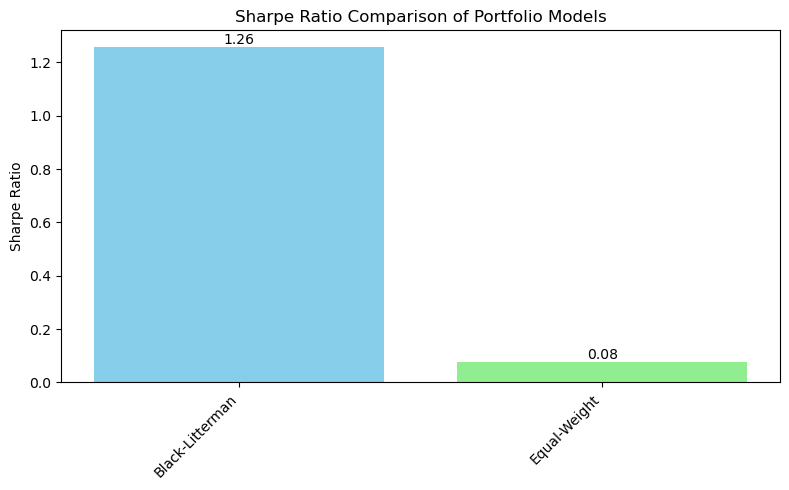

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
if 'comparison_metrics' in locals():
    # Extract Sharpe Ratios for the three portfolio models
    sharpe_ratios = {
        'CAPM': comparison_metrics.get('CAPM', {}).get('Sharpe Ratio'),
        'Black-Litterman': comparison_metrics.get('Black-Litterman', {}).get('Sharpe Ratio'),
        'Equal-Weight': comparison_metrics.get('Equal-Weight', {}).get('Sharpe Ratio')
    }
    sharpe_ratios_cleaned = {k: v for k, v in sharpe_ratios.items() if pd.notna(v)}
    if sharpe_ratios_cleaned:
        models = list(sharpe_ratios_cleaned.keys())
        sharpes = list(sharpe_ratios_cleaned.values())
        plt.figure(figsize=(8, 5))
        bars = plt.bar(models, sharpes, color=['skyblue', 'lightgreen', 'salmon'])
        plt.ylabel('Sharpe Ratio')
        plt.title('Sharpe Ratio Comparison of Portfolio Models')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
        plt.show()
    else:
        print("No valid Sharpe Ratios available for plotting the comparison.")
else:
    print("Model comparison metrics not available. Please run the cell to calculate comparison_metrics.")

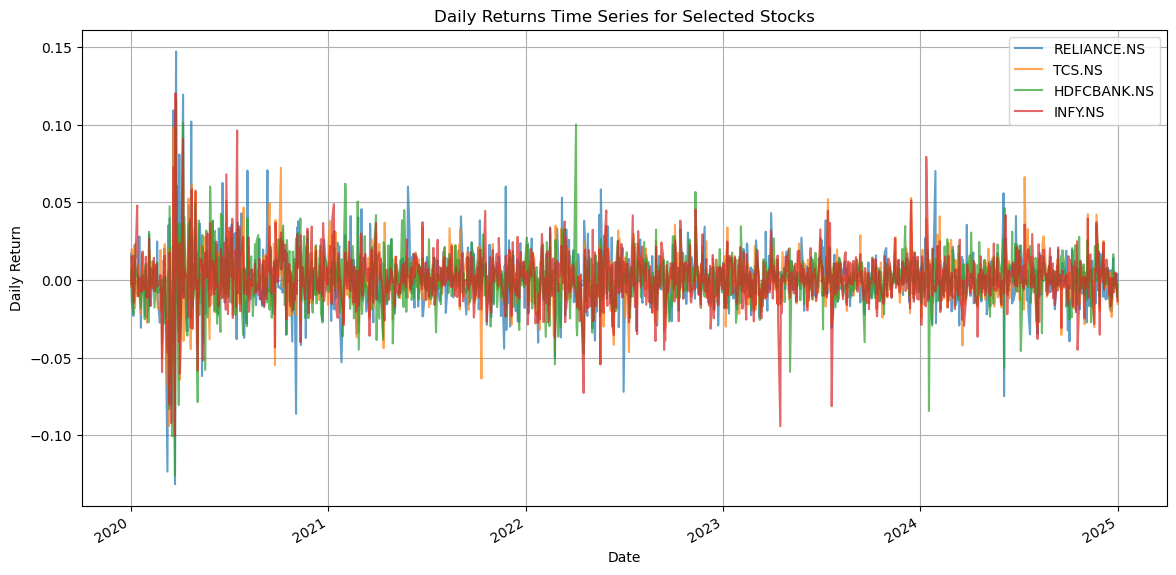

In [108]:
# Create a time series graph of daily returns for selected stocks
selected_stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS']
if all(stock in returns.columns for stock in selected_stocks):
    plt.figure(figsize=(14, 7))
    for stock in selected_stocks:
        returns[stock].plot(label=stock, alpha=0.7)
    plt.title('Daily Returns Time Series for Selected Stocks')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("One or more selected stocks not found in the returns data.")

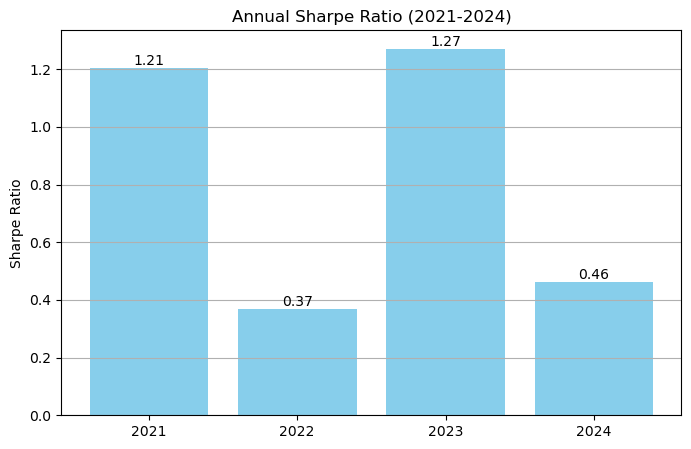

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Calculate annual Sharpe Ratio for each year from 2021 to 2024
annual_sharpe_ratios = {}
for year in range(2021, 2025):
    year_str = str(year)
    returns_year = returns.loc[year_str]
    if not returns_year.empty:
        mean_returns_year = returns_year.mean()
        cov_matrix_year = returns_year.cov()
        n_assets = returns_year.shape[1]
        equal_weights = np.repeat(1.0/n_assets, n_assets)
        annual_mean_return = mean_returns_year.mean() * 252
        annual_volatility = returns_year.std().mean() * np.sqrt(252) 
        annual_sharpe = annual_mean_return / (annual_volatility + 1e-9)
        annual_sharpe_ratios[year_str] = annual_sharpe
    else:
        print(f"No returns data for year {year}")
if annual_sharpe_ratios:
    years = list(annual_sharpe_ratios.keys())
    sharpes = list(annual_sharpe_ratios.values())
    plt.figure(figsize=(8, 5))
    bars = plt.bar(years, sharpes, color='skyblue')
    plt.ylabel('Sharpe Ratio')
    plt.title('Annual Sharpe Ratio (2021-2024)')
    plt.grid(axis='y')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    plt.show()
else:
    print("No annual Sharpe Ratios calculated for visualization.")

Cumulative Return from 2021 to 2025:
2.2356891127806833


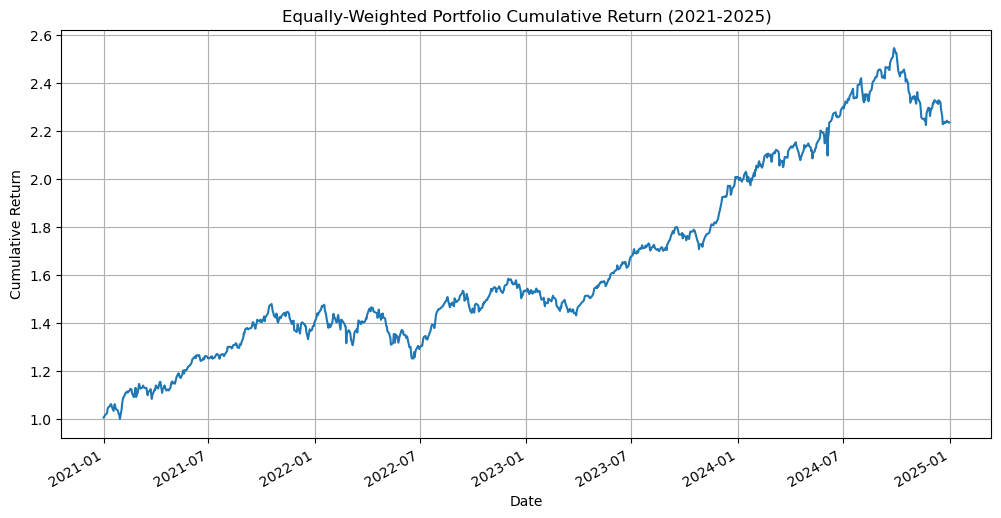

In [112]:
# Calculate Cumulative Return from 2021 to 2025
returns_2021_2025 = returns.loc['2021':'2025']
if not returns_2021_2025.empty:
    equal_weight_daily_return = returns_2021_2025.mean(axis=1)
    cumulative_return = (1 + equal_weight_daily_return).cumprod()
    print("Cumulative Return from 2021 to 2025:")
    print(cumulative_return.iloc[-1])
    plt.figure(figsize=(12, 6))
    cumulative_return.plot()
    plt.title('Equally-Weighted Portfolio Cumulative Return (2021-2025)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()
else:
    print("No returns data available for the period 2021-2025.")


Black-Litterman Portfolio Cumulative Return from 2021 to 2025:
2.1532071190832602


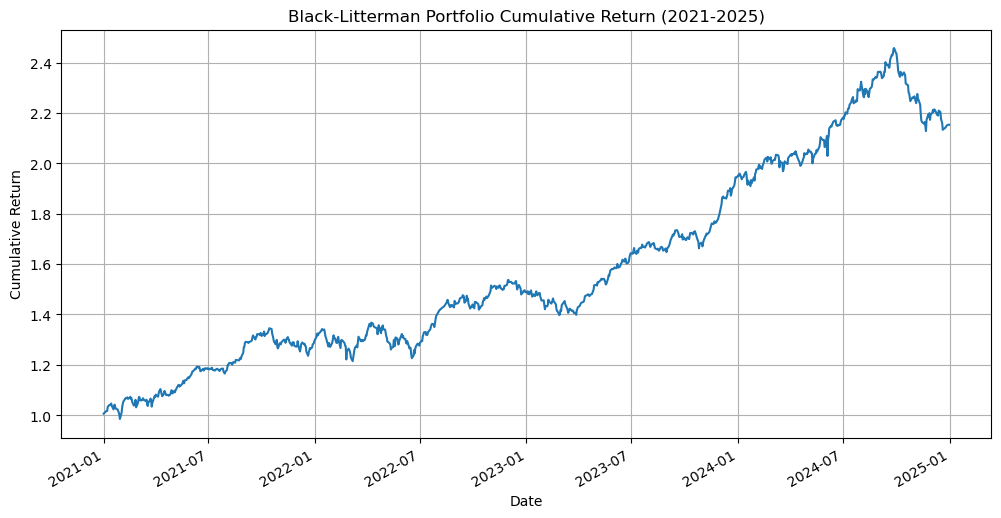

In [114]:
# Calculate Cumulative Return for Black-Litterman portfolio from 2021 to 2025
if 'weights_bl' in locals() and 'returns' in locals():
    returns_2021_2025 = returns.loc['2021':'2025']
    if not returns_2021_2025.empty:
        try:
            bl_portfolio_daily_return = returns_2021_2025.dot(weights_bl)
            bl_cumulative_return = (1 + bl_portfolio_daily_return).cumprod()
            print("\nBlack-Litterman Portfolio Cumulative Return from 2021 to 2025:")
            print(bl_cumulative_return.iloc[-1])
            plt.figure(figsize=(12, 6))
            bl_cumulative_return.plot()
            plt.title('Black-Litterman Portfolio Cumulative Return (2021-2025)')
            plt.xlabel('Date')
            plt.ylabel('Cumulative Return')
            plt.grid(True)
            plt.show()
        except ValueError as e:
             print(f"Error calculating Black-Litterman portfolio return. Ensure weights align with returns data: {e}")
    else:
        print("No returns data available for the period 2021-2025.")
else:
    print("Black-Litterman weights or returns data not available.")

In [116]:
print("Available cumulative returns:")
print("capm_cumulative_return:", 'capm_cumulative_return' in locals())
print("cumulative_return:", 'cumulative_return' in locals())
print("bl_cumulative_return:", 'bl_cumulative_return' in locals())

Available cumulative returns:
capm_cumulative_return: False
cumulative_return: True
bl_cumulative_return: True


In [149]:
print(type(capm_cumulative_return) if 'capm_cumulative_return' in locals() else "Not defined")

<class 'pandas.core.series.Series'>


In [132]:
# Calculate the average market return for the specified period
market_returns_2021_2025 = market_returns.loc['2021':'2025']
if not market_returns_2021_2025.empty:
    average_market_return_2021_2025 = market_returns_2021_2025.mean()
else:
    print("No market returns data available for the period 2021-2025.")
    average_market_return_2021_2025 = 0 # Or handle as appropriate

capm_df_aligned = capm_df.reindex(returns_2021_2025.columns)
expected_returns_capm = rf + capm_df_aligned['Beta'] * (average_market_return_2021_2025 - rf)

In [134]:
capm_portfolio_daily_return = returns_2021_2025.dot(equal_weights)

CAPM Cumulative Return Final Value: 2.3271830095270376


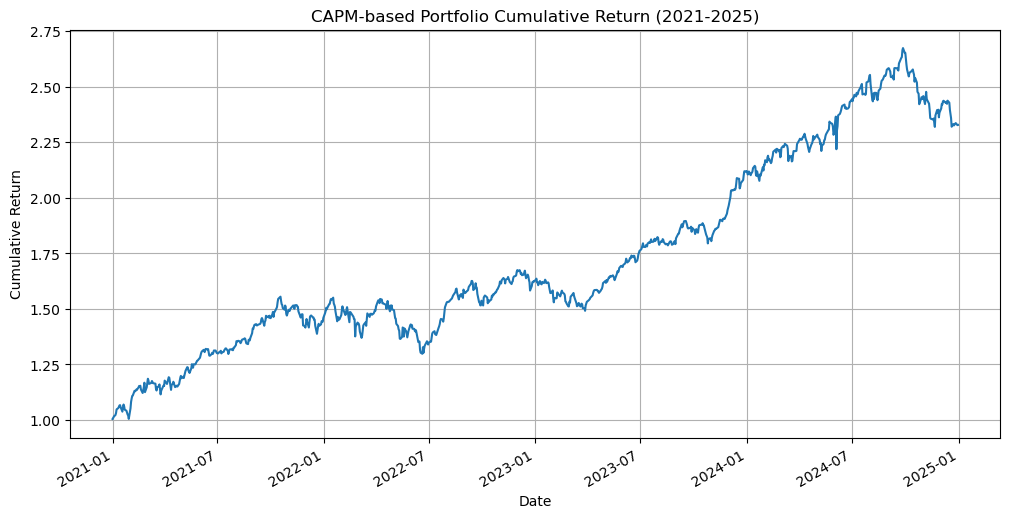

In [136]:
if 'capm_df' in locals() and 'market_returns' in locals() and 'rf' in locals():
    returns_2021_2025 = returns.loc['2021':'2025']
    market_returns_2021_2025 = market_returns.loc['2021':'2025']
    if not returns_2021_2025.empty and not market_returns_2021_2025.empty:
        average_market_return_2021_2025 = market_returns_2021_2025.mean()
        capm_df_aligned = capm_df.reindex(returns_2021_2025.columns)
        expected_returns_capm = rf + capm_df_aligned['Beta'] * (average_market_return_2021_2025 - rf)
        capm_weights = expected_returns_capm.dropna()
        common_tickers = returns_2021_2025.columns.intersection(capm_weights.index)
        returns_aligned = returns_2021_2025[common_tickers]
        weights_aligned = capm_weights.reindex(common_tickers)
        if not weights_aligned.empty:
            weights_aligned = weights_aligned / weights_aligned.sum()
        else:
            print("No common tickers found after dropping NaNs in CAPM weights.")
            capm_cumulative_return = pd.Series([1], index=[returns_2021_2025.index[0]])
            print("CAPM Cumulative Return Final Value:", capm_cumulative_return.iloc[-1])
            plt.figure(figsize=(12, 6))
            capm_cumulative_return.plot()
            plt.title('CAPM-based Portfolio Cumulative Return (2021-2025)')
            plt.xlabel('Date')
            plt.ylabel('Cumulative Return')
            plt.grid(True)
            plt.show()
            exit()
        capm_portfolio_daily_return = returns_aligned.dot(weights_aligned)
        capm_cumulative_return = (1 + capm_portfolio_daily_return).cumprod()
        print("CAPM Cumulative Return Final Value:", capm_cumulative_return.iloc[-1])
        plt.figure(figsize=(12, 6))
        capm_cumulative_return.plot()
        plt.title('CAPM-based Portfolio Cumulative Return (2021-2025)')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        plt.grid(True)
        plt.show()
    else:
        print("No returns data available for the period 2021-2025.")
else:
    print("CAPM results, market returns, or risk-free rate not available.")

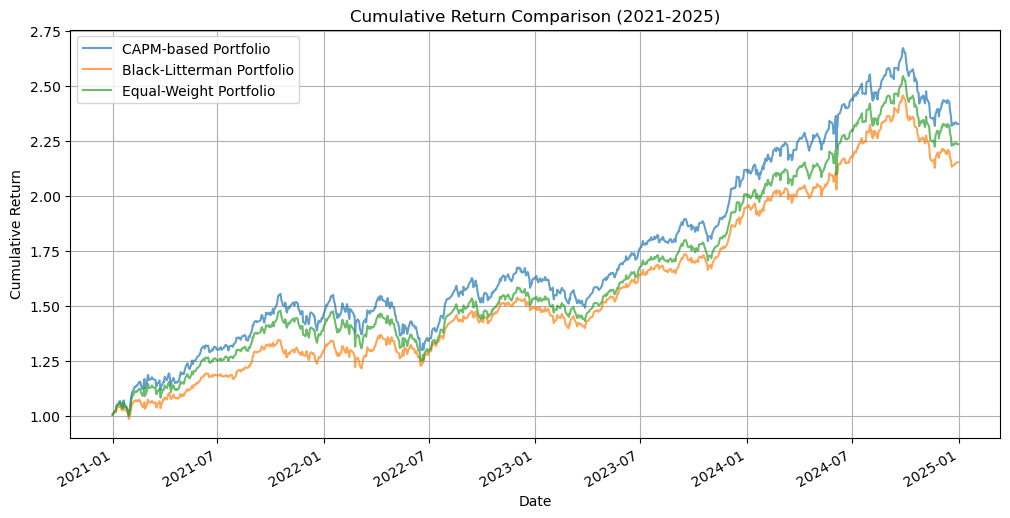

In [138]:
# Plot all three cumulative returns together
if 'capm_cumulative_return' in locals() and 'bl_cumulative_return' in locals() and 'cumulative_return' in locals():
    plt.figure(figsize=(12, 6))
    capm_cumulative_return.plot(label='CAPM-based Portfolio', alpha=0.7)
    bl_cumulative_return.plot(label='Black-Litterman Portfolio', alpha=0.7)
    cumulative_return.plot(label='Equal-Weight Portfolio', alpha=0.7)
    plt.title('Cumulative Return Comparison (2021-2025)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Cumulative return data for all models not available for plotting.")

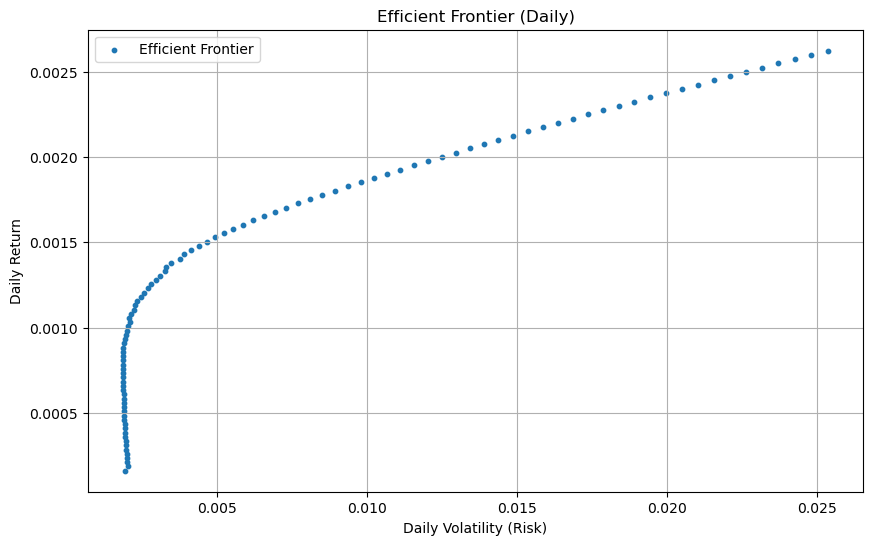

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxpy as cp
if 'mu' in locals() and 'Sigma' in locals() and not mu.empty and not Sigma.empty:
    n_assets = len(mu)
    returns_np = mu.values
    Sigma_np = Sigma.values
    def _nearest_psd(A, eps=1e-10):
        B = (A + A.T) / 2
        _, s, V = np.linalg.svd(B)
        s = np.maximum(s, eps)
        return V @ np.diag(s) @ V.T
    Sigma_psd = _nearest_psd(Sigma_np)
    n_portfolios = 100
    target_returns_daily = np.linspace(mu.min(), mu.max(), n_portfolios)
    portfolio_risks_daily = []
    portfolio_returns_daily = []
    for target_return_daily in target_returns_daily:
        weights = cp.Variable(n_assets)
        risk = cp.quad_form(weights, Sigma_psd)
        constraints = [
            cp.sum(weights) == 1,
            weights >= 0,
            returns_np @ weights >= target_return_daily
        ]
        prob = cp.Problem(cp.Minimize(risk), constraints)
        try:
            prob.solve(solver=cp.SCS, verbose=False)
            if prob.status in ("optimal", "optimal_inaccurate"):
                portfolio_risks_daily.append(np.sqrt(prob.value))
                portfolio_returns_daily.append(target_return_daily)
        except cp.error.SolverError:
            print(f"Solver failed for target return: {target_return_daily:.6f}")
            continue
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_risks_daily, portfolio_returns_daily, marker='o', s=10, label='Efficient Frontier')
    plt.xlabel('Daily Volatility (Risk)')
    plt.ylabel('Daily Return')
    plt.title('Efficient Frontier (Daily)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Mean returns or covariance matrix not available for plotting the efficient frontier.")

In [144]:
!pip install xgboost


Random Forest Regression Report:
MAE: 0.0135, RMSE: 0.0199, R2 Score: 0.0127

XGBoost Regression Report:
MAE: 0.0136, RMSE: 0.0200, R2 Score: 0.0043


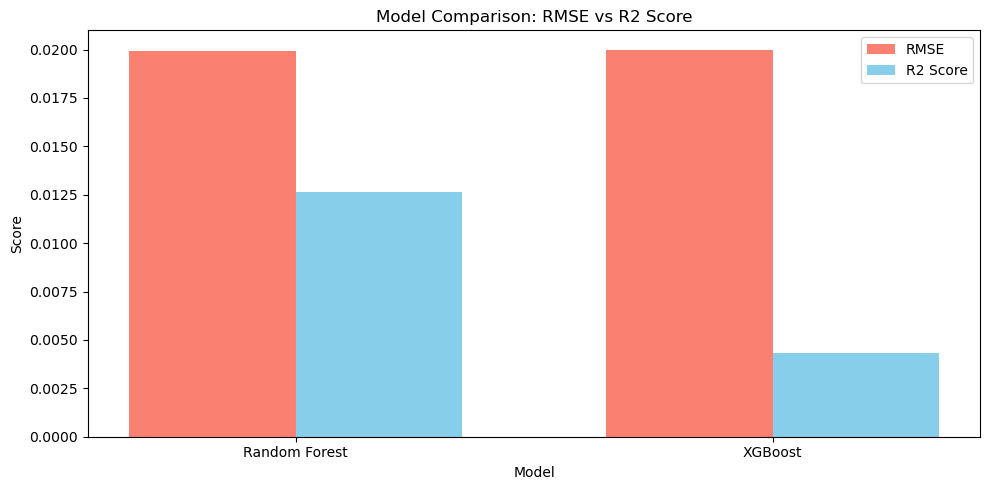

In [147]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
if 'returns' in locals() and not returns.empty:
    n_lags = 5
    X = []
    y = []
    tickers = returns.columns
    for ticker in tickers:
        for i in range(n_lags, len(returns[ticker]) - 1):
            lagged_returns = returns[ticker].iloc[i - n_lags : i].values
            target_return = returns[ticker].iloc[i + 1]
            X.append(lagged_returns)
            y.append(target_return)
    if X and y:
        X = np.array(X)
        y = np.array(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
        xgb_model = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=5)
        rf_model.fit(X_train, y_train)
        xgb_model.fit(X_train, y_train)
        rf_preds = rf_model.predict(X_test)
        xgb_preds = xgb_model.predict(X_test)
        def get_regression_metrics(y_true, y_pred, model_name):
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            print(f"\n{model_name} Regression Report:")
            print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")
            return {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}
        metrics = []
        metrics.append(get_regression_metrics(y_test, rf_preds, 'Random Forest'))
        metrics.append(get_regression_metrics(y_test, xgb_preds, 'XGBoost'))
        metrics_df = pd.DataFrame(metrics)
        import matplotlib.pyplot as plt # Import matplotlib
        bar_width = 0.35
        index = np.arange(len(metrics_df))
        plt.figure(figsize=(10, 5))
        plt.bar(index, metrics_df['RMSE'], bar_width, label='RMSE', color='salmon')
        plt.bar(index + bar_width, metrics_df['R2 Score'], bar_width, label='R2 Score', color='skyblue')
        plt.xlabel('Model')
        plt.ylabel('Score')
        plt.title('Model Comparison: RMSE vs R2 Score')
        plt.xticks(index + bar_width / 2, metrics_df['Model'])
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough data to create features and target for regression models.")
else:
    print("Returns data not available or is empty. Cannot train regression models.")